# Problem statement


The purpose of this analysis is to predict the quality of a wine given its input variables. Use AUC (area under the receiver operating characteristic curve) as the evaluation metric. This analysis made use of several machine learning algorithms:
- Grid Search CV
- Pipelines
- K-Neighbours Classifier
- Logistic Regression
- Voting Classifier
All of which were from scikit-learn.

## Dataset

The dataset was adapted from the Wine Quality Dataset (https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

### Attribute Information:

For more information, read [Cortez et al., 2009: http://dx.doi.org/10.1016/j.dss.2009.05.016].

Input variables (based on physicochemical tests):

    1 - fixed acidity 
    2 - volatile acidity 
    3 - citric acid 
    4 - residual sugar 
    5 - chlorides 
    6 - free sulfur dioxide 
    7 - total sulfur dioxide 
    8 - density 
    9 - pH 
    10 - sulphates 
    11 - alcohol 
Output variable (based on sensory data):

    12 - quality (0: normal wine, 1: good wine)
    


First, let's load and explore the dataset.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed = 42

In [25]:
data = pd.read_csv("whitewine.csv")
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4715 entries, 0 to 4714
Data columns (total 12 columns):
fixed_acidity           4715 non-null float64
volatile_acidity        4715 non-null float64
citric_acid             4715 non-null float64
residual_sugar          4715 non-null float64
chlorides               4715 non-null float64
free_sulfur_dioxide     4715 non-null float64
total_sulfur_dioxide    4715 non-null float64
density                 4715 non-null float64
pH                      4715 non-null float64
sulphates               4715 non-null float64
alcohol                 4715 non-null float64
quality                 4715 non-null int64
dtypes: float64(11), int64(1)
memory usage: 442.1 KB


In [27]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000,4715.00000,4715.000000,4715.000000,4715.000000,4715.000000,4715.000000
mean,6.842131,0.274448,0.335220,6.452365,0.045587,35.644751,138.67614,0.994015,3.188456,0.490386,10.527493,0.224814
std,0.826105,0.095110,0.119301,5.089551,0.021521,16.134741,41.51303,0.003008,0.150290,0.113958,1.236029,0.417504
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.00000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,24.000000,109.00000,0.991700,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.300000,0.043000,34.000000,134.00000,0.993700,3.180000,0.480000,10.400000,0.000000
75%,7.300000,0.320000,0.390000,10.000000,0.050000,46.000000,167.00000,0.996100,3.280000,0.550000,11.400000,0.000000
max,14.200000,0.965000,1.660000,65.800000,0.346000,131.000000,344.00000,1.038980,3.820000,1.080000,14.200000,1.000000


In [28]:
data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The white wine dataset doesn't have any missing values/rows/cells for any of the variables/feature.
It seems that data has been collected neatly or prior cleaning has been performed before publishing the dataset.

In [29]:
data["quality"].value_counts()

0    3655
1    1060
Name: quality, dtype: int64

### Corelation between features/variables:

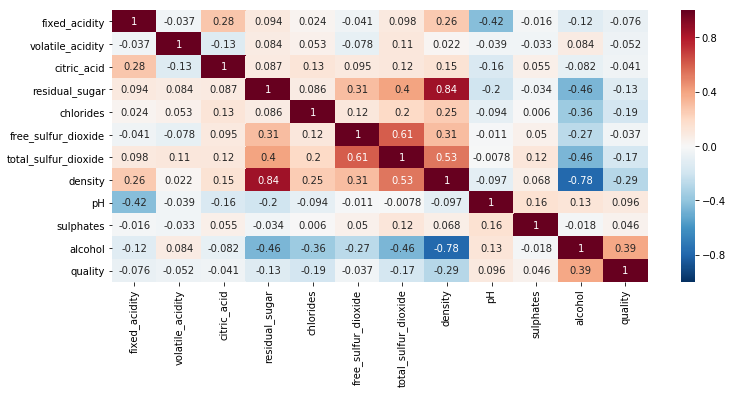

In [30]:
correlation = data.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

## Machine Learning

**[1]. Split the given data using stratify sampling into 2 subsets: training (80%) and test (20%) sets. Use random_state = 42.**

In [31]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, train_size=0.8, random_state=42, stratify=data['quality'])
X_train = train.drop(columns=['quality'])
y_train = train['quality']

X_test = test.drop(columns=['quality'])
y_test = test['quality']

**[2]. Use ``GridSearchCV`` and ``Pipeline`` to tune hyper-parameters for 3 different classifiers including ``KNeighborsClassifier``, ``LogisticRegression`` and ``svm.SVC`` and report the corresponding AUC values on the training and test sets. Note that a scaler may need to be inserted into each pipeline.**

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

logistic = LogisticRegression()
pipe_logistic = Pipeline(steps=[('model', logistic)])
param_grid = {
    'model__penalty': ['l2'],
    'model__tol': [1e-4],
    'model__solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
}
search_logistic = GridSearchCV(pipe_logistic, param_grid, iid=False, cv=5)
search_logistic.fit(X_train, y_train)
print('------------- LOGISTIC -------------')
print('Best parameters (logistic):', search_logistic.best_params_)
print('Train AUC (logistic):', roc_auc_score(y_train, search_logistic.predict_proba(X_train)[:,1]))
print('Test AUC (logistic):', roc_auc_score(y_test, search_logistic.predict_proba(X_test)[:,1]))
print()

knn = KNeighborsClassifier()
pipe_knn = Pipeline(steps=[('scale', StandardScaler()), ('model', knn)])
param_grid = {
    'model__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'model__algorithm': ['kd_tree'],
}
search_knn = GridSearchCV(pipe_knn, param_grid, iid=False, cv=5)
search_knn.fit(X_train, y_train)
print('------------- KNN -------------')
print('Best parameters (knn):', search_knn.best_params_)
print('Train AUC (knn):', roc_auc_score(y_train, search_knn.predict_proba(X_train)[:,1]))
print('Test AUC (knn):', roc_auc_score(y_test, search_knn.predict_proba(X_test)[:,1]))
print()

svm = SVC(probability=True)
pipe_svm = Pipeline(steps=[('model', svm)])
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10],
    'model__gamma': [0.001, 0.01, 0.1, 1],
}
search_svm = GridSearchCV(pipe_svm, param_grid, iid=False, cv=5)
search_svm.fit(X_train, y_train)
print('------------- SVM -------------')
print('Best parameters (svm):', search_svm.best_params_)
print('Train AUC (svm):', roc_auc_score(y_train, search_svm.predict_proba(X_train)[:,1]))
print('Test AUC (svm):', roc_auc_score(y_test, search_svm.predict_proba(X_test)[:,1]))
print()


------------- LOGISTIC -------------
Best parameters (logistic): {'model__penalty': 'l2', 'model__solver': 'liblinear', 'model__tol': 0.0001}
Train AUC (logistic): 0.7714837196396768
Test AUC (logistic): 0.7832124512815217

------------- KNN -------------
Best parameters (knn): {'model__algorithm': 'kd_tree', 'model__n_neighbors': 2}
Train AUC (knn): 0.9827622086570478
Test AUC (knn): 0.8370286245257208

------------- SVM -------------
Best parameters (svm): {'model__C': 1, 'model__gamma': 1}
Train AUC (svm): 1.0
Test AUC (svm): 0.8486113620524999



**[3]. Train a soft ``VotingClassifier`` with the estimators are the three tuned pipelines obtained from [2]. Report the AUC values on the training and test sets. Comment on the performance of the ensemble model.**

Document: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier

In [33]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier([('logistic', pipe_logistic), ('knn', pipe_knn), ('svm', pipe_svm)], voting='soft')
ensemble.fit(X_train, y_train)
print('------------- Voting Classifier -------------')
print('Train AUC (Ensemble):', roc_auc_score(y_train, ensemble.predict_proba(X_train)[:,1]))
print('Test AUC (Ensemble):', roc_auc_score(y_test, ensemble.predict_proba(X_test)[:,1]))
print()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


------------- Voting Classifier -------------
Train AUC (Ensemble): 0.9673090138863796
Test AUC (Ensemble): 0.8938517925818856



**[4]. Redo [3] with a sensible set of ``weights`` for the estimators. Comment on the performance of the ensemble model in this case.**

In [34]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier([('logistic', pipe_logistic), ('knn', pipe_knn), ('svm', pipe_svm)], voting='soft', weights=[0.2, 0.25, 0.55])
ensemble.fit(X_train, y_train)
print('------------- Voting Classifier -------------')
print('Train AUC (Ensemble):', roc_auc_score(y_train, ensemble.predict_proba(X_train)[:,1]))
print('Test AUC (Ensemble):', roc_auc_score(y_test, ensemble.predict_proba(X_test)[:,1]))
print()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


------------- Voting Classifier -------------
Train AUC (Ensemble): 0.9781331466329402
Test AUC (Ensemble): 0.8956134011305269



**[5] Use the ``VotingClassifier`` with ``GridSearchCV`` to tune the hyper-parameters of the individual estimators. The parameter grid should be a combination of those in [2]. Report the AUC values on the training and test sets. Comment on the performance of the ensemble model.**

Document: https://scikit-learn.org/stable/modules/ensemble.html#using-the-votingclassifier-with-gridsearchcv

In [35]:
param_grid = {
    'logistic__model__penalty': ['l2'],
    'logistic__model__tol': [1e-4],
    'logistic__model__solver': ['lbfgs', 'liblinear'],
    'knn__model__n_neighbors': [2, 3],
    'knn__model__algorithm': ['kd_tree'],
    'svm__model__C': [0.01, 1],
    'svm__model__gamma': [0.01, 1],
}
search = GridSearchCV(ensemble, param_grid, iid=False, cv=5)
search.fit(X_train, y_train)
print('------------- Voting Classifier -------------')
print('Train AUC (Ensemble):', roc_auc_score(y_train, search.predict_proba(X_train)[:,1]))
print('Test AUC (Ensemble):', roc_auc_score(y_test, search.predict_proba(X_test)[:,1]))
print()

------------- Voting Classifier -------------
Train AUC (Ensemble): 1.0
Test AUC (Ensemble): 0.9207985958753839

